In [ ]:
#There are many more rides, fares and drivers in urban areas (Urban $39k, 1625 fares; Rural $4.3k, 125 fares).  
#Fares (Rural $34 per ride, Urban $24 per ride) tend to be higher in rural areas both per ride and per driver (Rural $8 per driver, Urban $0.66 per driver), probably due to longer distances and fewer drivers servicing the areas (Rural 4 drivers per ride, Urban 36 drivers per ride). 
#The data clusters representing individual cities are more tightly packed in urban areas meaning this data is more similar to its cohors, versus rural areas which are more disparate to each other.  Suburban areas fall in the middle in terms of analysis in all fields.

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combo_df = pd.merge(city_df, ride_df, how='outer', on='city')
# Display the data table for preview
combo_df.dtypes

city             object
driver_count      int64
type             object
date             object
fare            float64
ride_id           int64
dtype: object

In [3]:
type_df = combo_df['type'].value_counts()
type_df = pd.DataFrame(type_df)
type_df = type_df.reset_index()
type_df = type_df.rename(columns={'index': 'type', 'type': 'ride_count'})
type_df.head()

,type,ride_count
0,Urban,1625
1,Suburban,625
2,Rural,125


In [4]:
total_rides = type_df['ride_count'].sum()
#urban_rides = type_df.loc[type_df['type'] == 'Urban', ['ride_count']].sum()
urban_rides = type_df['ride_count'][0]
suburban_rides = type_df['ride_count'][1]
rural_rides = type_df['ride_count'][2]
perc_urban_rides = urban_rides/total_rides * 100
percf_urban_rides = f"{round(perc_urban_rides,2)}%"
perc_suburban_rides = (suburban_rides/total_rides) * 100
percf_suburban_rides = f"{round(perc_suburban_rides,2)}%"
perc_rural_rides = (rural_rides/total_rides) * 100
percf_rural_rides = f"{round(perc_rural_rides,2)}%"
total_rides, urban_rides, suburban_rides, rural_rides, percf_urban_rides, percf_suburban_rides, percf_rural_rides

(2375, 1625, 625, 125, '68.42%', '26.32%', '5.26%')

In [5]:
type_df['type_percent'] = [perc_urban_rides, perc_suburban_rides, perc_rural_rides]
#type_df['type_percent'][0] = perc_urban_rides
type_df

,type,ride_count,type_percent
0,Urban,1625,68.421053
1,Suburban,625,26.315789
2,Rural,125,5.263158


In [6]:
combo_df[['city', 'driver_count']].values

array([['Richardfort', 38],
       ['Richardfort', 38],
       ['Richardfort', 38],
       ...,
       ['South Saramouth', 7],
       ['South Saramouth', 7],
       ['South Saramouth', 7]], dtype=object)

In [7]:
amandaburgh = combo_df.loc[combo_df['city'] == "Amandaburgh", :]
amandaburgh.head()

,city,driver_count,type,date,fare,ride_id
1520,Amandaburgh,12,Urban,2018-03-05 02:15:38,26.28,906850928986
1521,Amandaburgh,12,Urban,2018-02-24 23:10:49,43.66,6573820412437
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1524,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492


In [8]:
city_driver_count = combo_df[['city', 'driver_count']]
city_driver_count = city_driver_count.drop_duplicates()
city_driver_count.head()

,city,driver_count
0,Richardfort,38
28,Williamsstad,59
51,Port Angela,67
70,Rodneyfort,34
93,West Robert,39


In [9]:
agg_data = combo_df.groupby(['city', 'type']).agg({'fare': ['mean', 'sum'],
                                                   'driver_count': ['count'],
                                                   'ride_id': ['count']})
agg_data_df = pd.DataFrame(agg_data)
agg_data_df.head()

fare         driver_count ride_id
                             mean     sum        count   count
city          type                                            
Amandaburgh   Urban     24.641667  443.55           18      18
Barajasview   Urban     25.332273  557.31           22      22
Barronchester Suburban  36.422500  582.76           16      16
Bethanyland   Suburban  32.956111  593.21           18      18
Bradshawfurt  Rural     40.064000  400.64           10      10

In [10]:
agg_data_df.columns

MultiIndex(levels=[['fare', 'driver_count', 'ride_id'], ['count', 'mean', 'sum']],
           labels=[[0, 0, 1, 2], [1, 2, 0, 0]])

In [11]:
gby_city_type_data = combo_df[['city','type']]
gby_city_type_data = gby_city_type_data.drop_duplicates()
gby_city_type_data

,city,type
0,Richardfort,Urban
28,Williamsstad,Urban
51,Port Angela,Urban
70,Rodneyfort,Urban
93,West Robert,Urban
124,West Anthony,Urban
154,West Angela,Urban
193,Martinezhaven,Urban
217,Karenberg,Urban
234,Barajasview,Urban


In [12]:
combo_df.columns

Index(['city', 'driver_count', 'type', 'date', 'fare', 'ride_id'], dtype='object')

In [13]:
gby_city_data = combo_df.groupby(['city'])
gby_type_data = combo_df.groupby(['type'])
gby_city_data.head()
gby_type_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
1625,Port Shane,7,Suburban,2018-04-09 15:34:40,27.66,4022340141966
1626,Port Shane,7,Suburban,2018-04-23 16:05:47,42.26,8341982666719
1627,Port Shane,7,Suburban,2018-03-02 12:06:00,14.95,2803204948363
1628,Port Shane,7,Suburban,2018-03-26 04:33:30,19.03,6010401984537
1629,Port Shane,7,Suburban,2018-03-15 12:09:42,31.58,2552978514662


In [14]:
city_type_drvcount_df = combo_df[['city', 'type', 'driver_count']]
unique_city_type_drvcount_df = city_type_drvcount_df.drop_duplicates()
unique_city_type_drvcount_df.dtypes
gby_city_type = city_type_drvcount_df.groupby(['type'])
gby_city_type_df = pd.DataFrame(gby_city_type.sum())
gby_city_type_df = gby_city_type_df.reset_index()
gby_city_type_df


,type,driver_count
0,Rural,537
1,Suburban,8570
2,Urban,59602


In [15]:
unique_df = pd.DataFrame(unique_city_type_drvcount_df)
unique_df['driver_count'].sum()

2973

In [16]:
total_drivers = gby_city_type_df['driver_count'].sum()
#urban_drivers = gby_city_type_df.loc[gby_city_type_df['type'] == 'Urban', ['driver_count']].sum()
urban_drivers = gby_city_type_df['driver_count'][0]
suburban_drivers = gby_city_type_df['driver_count'][1]
rural_drivers = gby_city_type_df['driver_count'][2]
perc_urban_drivers = urban_drivers/total_drivers * 100
percf_urban_drivers = f"{round(perc_urban_drivers,2)}%"
perc_suburban_drivers = (suburban_drivers/total_drivers) * 100
percf_suburban_drivers = f"{round(perc_suburban_drivers,2)}%"
perc_rural_drivers = (rural_drivers/total_drivers) * 100
percf_rural_drivers = f"{round(perc_rural_drivers,2)}%"
total_drivers, urban_drivers, suburban_drivers, rural_drivers, percf_urban_drivers, percf_suburban_drivers, percf_rural_drivers

(68709, 537, 8570, 59602, '0.78%', '12.47%', '86.75%')

In [17]:
gby_city_type_df['type_percent'] = [perc_urban_drivers, perc_suburban_drivers, perc_rural_drivers]
#type_df['type_percent'][0] = perc_urban_rides
type_df

,type,ride_count,type_percent
0,Urban,1625,68.421053
1,Suburban,625,26.315789
2,Rural,125,5.263158


In [18]:
type_drvcount_df = unique_city_type_drvcount_df[['type', 'driver_count']]
type_drvcount_df.head()

,type,driver_count
0,Urban,38
28,Urban,59
51,Urban,67
70,Urban,34
93,Urban,39


In [19]:
type_drvcount_df.sum()

type            UrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanU...
driver_count                                                 2973
dtype: object

In [20]:
type_fare_df = gby_type_data[['type', 'fare']]
type_fare_df.head()

,type,fare
0,Urban,13.93
1,Urban,14.00
2,Urban,17.92
3,Urban,10.26
4,Urban,23.00
1625,Suburban,27.66
1626,Suburban,42.26
1627,Suburban,14.95
1628,Suburban,19.03
1629,Suburban,31.58


In [21]:
type_fare_sum_df = type_fare_df.sum()
type_fare_sum_df = type_fare_sum_df.reset_index()
type_fare_sum_df

,type,fare
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


In [22]:
total_fares = type_fare_sum_df['fare'].sum()
total_fares = round(total_fares, 2)
#urban_fares = type_fare_sum_df.loc[type_fare_sum_df['type'] == 'Urban', ['fare']].sum()
urban_fares = type_fare_sum_df['fare'][0]
suburban_fares = type_fare_sum_df['fare'][1]
suburban_fares = round(suburban_fares, 2)
rural_fares = type_fare_sum_df['fare'][2]
perc_urban_fares = urban_fares/total_fares * 100
percf_urban_fares = f"{round(perc_urban_fares,2)}%"
perc_suburban_fares = (suburban_fares/total_fares) * 100
percf_suburban_fares = f"{round(perc_suburban_fares,2)}%"
perc_rural_fares = (rural_fares/total_fares) * 100
percf_rural_fares = f"{round(perc_rural_fares,2)}%"
total_fares, urban_fares, suburban_fares, rural_fares, percf_urban_fares, percf_suburban_fares, percf_rural_fares

(63538.64, 4327.93, 19356.33, 39854.38, '6.81%', '30.46%', '62.72%')

In [23]:
type_fare_sum_df['type_percent'] = [perc_urban_fares, perc_suburban_fares, perc_rural_fares]
#type_df['type_percent'][0] = perc_urban_rides
type_df

,type,ride_count,type_percent
0,Urban,1625,68.421053
1,Suburban,625,26.315789
2,Rural,125,5.263158


In [24]:
type_ride_totals = gby_type_data['type'].value_counts()
type_ride_totals_df = pd.DataFrame(type_ride_totals)
type_ride_totals_df.head()




,,type
type,type,
Rural,Rural,125
Suburban,Suburban,625
Urban,Urban,1625


In [25]:
gby_city_df_count = pd.DataFrame(gby_city_data.count())
gby_city_df_count = gby_city_df_count.reset_index()
gby_city_df_count.head()

,city,driver_count,type,date,fare,ride_id
0,Amandaburgh,18,18,18,18,18
1,Barajasview,22,22,22,22,22
2,Barronchester,16,16,16,16,16
3,Bethanyland,18,18,18,18,18
4,Bradshawfurt,10,10,10,10,10


In [26]:
city_ride_count = gby_city_df_count[['city', 'driver_count']]
city_ride_count = city_ride_count.rename(columns={'driver_count': 'ride_count'})
city_ride_count.head()

,city,ride_count
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [27]:
gby_city_df_mean = pd.DataFrame(gby_city_data.mean())
gby_city_df_mean.head()

,driver_count,fare,ride_id
city,,,
Amandaburgh,12.0,24.641667,5.359336e+12
Barajasview,26.0,25.332273,4.676968e+12
Barronchester,11.0,36.422500,4.460796e+12
Bethanyland,22.0,32.956111,5.842550e+12
Bradshawfurt,7.0,40.064000,3.735294e+12


In [28]:
gby_city_df_mean = gby_city_df_mean.reset_index()

In [29]:
gby_city_df_mean.columns

Index(['city', 'driver_count', 'fare', 'ride_id'], dtype='object')

In [30]:
city_fare_mean = gby_city_df_mean[['city', 'fare']]
city_fare_mean = city_fare_mean.rename(columns={'fare': 'avg_fare'})
city_fare_mean.head()

,city,avg_fare
0,Amandaburgh,24.641667
1,Barajasview,25.332273
2,Barronchester,36.422500
3,Bethanyland,32.956111
4,Bradshawfurt,40.064000


In [31]:
richardfort = gby_city_df_mean.loc[gby_city_df_mean['city'] == "Richardfort", :]
richardfort

,city,driver_count,fare,ride_id
80,Richardfort,38.0,22.373214,4.805922e+12


In [32]:
city_merge_df = pd.merge(city_driver_count, city_ride_count, on=['city'], how='inner')
city_merge_df = pd.merge(city_merge_df, city_fare_mean, on=['city'], how='inner')
city_merge_df = pd.merge(city_merge_df, gby_city_type_data, on=['city'], how='inner')
city_merge_df.head()

,city,driver_count,ride_count,avg_fare,type
0,Richardfort,38,28,22.373214,Urban
1,Williamsstad,59,23,24.362174,Urban
2,Port Angela,67,19,23.836842,Urban
3,Rodneyfort,34,23,28.616957,Urban
4,West Robert,39,31,25.123871,Urban


In [33]:
x_max = city_merge_df['ride_count'].max()
x_min = city_merge_df['ride_count'].min()
y_max = city_merge_df['avg_fare'].max()
y_min = city_merge_df['avg_fare'].min()
dr_max = city_merge_df['driver_count'].max()
dr_min = city_merge_df['driver_count'].min()
x_min, x_max, y_min, y_max, dr_max, dr_min

(3, 39, 20.093157894736848, 43.278333333333336, 73, 1)

In [50]:
type_merge = pd.merge(gby_city_type_df, type_df, on=['type'], how="inner")
type_merge = pd.merge(type_merge, type_fare_sum_df, on=['type'], how="inner")
#type_merge = type_merge.set_index('type')
type_merge = type_merge.rename(columns={"type_percent_x": "driver_percent", "type_percent_y": "ride_percent","fare": "fare_total", "type_percent": "fare_percent"})
type_merge['fare_per_ride'] = type_merge['fare_total'] /type_merge['ride_count']
type_merge['fare_per_driver'] = type_merge['fare_total'] /type_merge['driver_count']
type_merge['driver_per_ride'] = type_merge['driver_count'] /type_merge['ride_count']
type_merge

,type,driver_count,driver_percent,ride_count,ride_percent,fare_total,fare_percent,fare_per_ride,fare_per_driver,driver_per_ride
0,Rural,537,0.781557,125,5.263158,4327.93,6.811493,34.623440,8.059460,4.296000
1,Suburban,8570,12.472893,625,26.315789,19356.33,30.463872,30.970128,2.258615,13.712000
2,Urban,59602,86.745550,1625,68.421053,39854.38,62.724635,24.525772,0.668675,36.678154


## Bubble Plot of Ride Sharing Data

In [35]:
rural_ride = city_merge_df.loc[city_merge_df['type'] == 'Rural',['ride_count','city']]
rural_fare = city_merge_df.loc[city_merge_df['type'] == 'Rural',['avg_fare','city']]
rural_driver = city_merge_df.loc[city_merge_df['type'] == 'Rural',['driver_count','city']]
rural_ride = rural_ride.set_index('city')
rural_fare = rural_fare.set_index('city')
rural_driver = rural_driver.set_index('city')
rural_driver
suburban_ride = city_merge_df.loc[city_merge_df['type'] == 'Suburban',['ride_count','city']]
suburban_fare = city_merge_df.loc[city_merge_df['type'] == 'Suburban',['avg_fare','city']]
suburban_driver = city_merge_df.loc[city_merge_df['type'] == 'Suburban',['driver_count','city']]
suburban_ride = suburban_ride.set_index('city')
suburban_fare = suburban_fare.set_index('city')
suburban_driver = suburban_driver.set_index('city')
suburban_driver
urban_ride = city_merge_df.loc[city_merge_df['type'] == 'Urban',['ride_count','city']]
urban_fare = city_merge_df.loc[city_merge_df['type'] == 'Urban',['avg_fare','city']]
urban_driver = city_merge_df.loc[city_merge_df['type'] == 'Urban',['driver_count','city']]
urban_ride = urban_ride.set_index('city')
urban_fare = urban_fare.set_index('city')
urban_driver = urban_driver.set_index('city')
urban_driver

,driver_count
city,
Richardfort,38
Williamsstad,59
Port Angela,67
Rodneyfort,34
West Robert,39
West Anthony,70
West Angela,48
Martinezhaven,25
Karenberg,22


In [36]:
#fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
#fig.suptitle("Pyber Ride Sharing Data(2016)")

#ax1.scatter(rural_ride, rural_fare, s=rural_driver, c='coral')
#ax

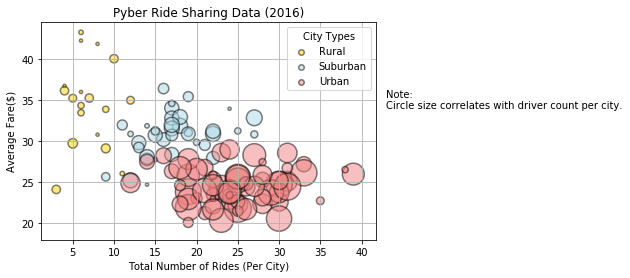

<Figure size 936x360 with 0 Axes>

In [37]:
#https://stackoverflow.com/questions/24706125/setting-a-fixed-size-for-points-in-legend
#https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot
#https://stackoverflow.com/questions/47115869/how-do-i-change-the-size-of-the-scatter-markers-in-the-legend
#https://stackoverflow.com/questions/39500265/manually-add-legend-items-python-matplotlib
rural = plt.scatter(rural_ride, rural_fare, s=rural_driver*10, alpha=.5, c='gold', edgecolor='black', label='Rural', linewidths=1.5)
suburban = plt.scatter(suburban_ride, suburban_fare, s=suburban_driver*10, alpha=.5, c='lightblue', edgecolor='black', label='Suburban', linewidths=1.5)
urban = plt.scatter(urban_ride, urban_fare, s=urban_driver*10, alpha=.5, c='lightcoral', edgecolor='black', label='Urban', linewidths=1.5)

lgnd = plt.legend(title="City Types", handles=[rural, suburban, urban], loc='upper right')
plt.grid(True)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.text(43, 34, "Note:\nCircle size correlates with driver count per city.")
plt.figure(figsize=(13,5))

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
#plt.tight_layout()
plt.show()

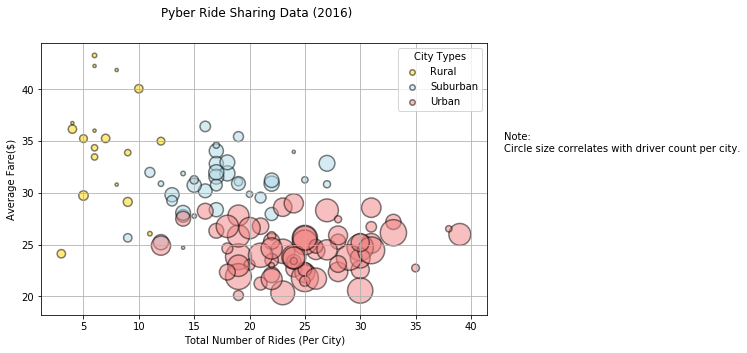

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle("Pyber Ride Sharing Data (2016)")
rural = ax.scatter(rural_ride, rural_fare, s=rural_driver*10, alpha=.5, c='gold', edgecolor='black', label='Rural', linewidths=1.5)
suburban = ax.scatter(suburban_ride, suburban_fare, s=suburban_driver*10, alpha=.5, c='lightblue', edgecolor='black', label='Suburban', linewidths=1.5)
urban = ax.scatter(urban_ride, urban_fare, s=urban_driver*10, alpha=.5, c='lightcoral', edgecolor='black', label='Urban', linewidths=1.5)

lgnd = plt.legend(title="City Types", handles=[rural, suburban, urban], loc='upper right')
plt.grid(True)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html
plt.text(43, 34, "Note:\nCircle size correlates with driver count per city.")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
#plt.tight_layout()
plt.show()

In [39]:
#ride_share_plot = city_merge_df.plot(kind='scatter', x='ride_count', y='avg_fare', grid=True, title="Pyber Ride Sharing Data (2016)", label=('Rural', 'Suburban', 'Urban'))
#plt.show()
#plt.legend(handles=[Ur])

In [40]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("../Images/RideShareBubblePlot.png")

<Figure size 432x288 with 0 Axes>

In [41]:
# Show plot
plt.show()

## Total Fares by City Type

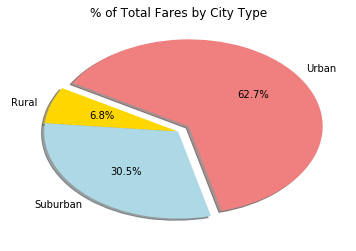

<Figure size 432x288 with 0 Axes>

In [42]:
# Calculate Ride Percents
labels = type_fare_sum_df['type']
colors = ['gold', 'lightblue', 'lightcoral']
explode = [0, 0, 0.1]
# Build Pie Chart

# Save Figure
plt.pie(type_fare_sum_df['type_percent'], labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=150, explode=explode)
plt.title("% of Total Fares by City Type")
plt.show()
plt.savefig("../Images/FaresByTypePlot.png")

In [43]:
# Show Figure
plt.show()

## Total Rides by City Type

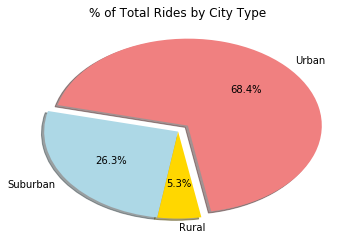

<Figure size 432x288 with 0 Axes>

In [44]:
# Calculate Ride Percents
labels = type_df['type']
colors = ['lightcoral', 'lightblue', 'gold']
explode = [.1, 0, 0]
# Build Pie Chart

# Save Figure
plt.pie(type_df['type_percent'], labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=280, explode=explode)
plt.title("% of Total Rides by City Type")
plt.show()
plt.savefig("../Images/RidesByTypePlot.png")

In [45]:
# Show Figure
plt.show()

## Total Drivers by City Type

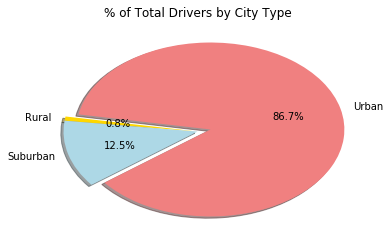

<Figure size 432x288 with 0 Axes>

In [46]:
# Calculate Ride Percents
labels = gby_city_type_df['type']
colors = ['gold', 'lightblue', 'lightcoral']
explode = [0, 0, .1]
# Build Pie Chart

# Save Figure
plt.pie(gby_city_type_df['type_percent'], labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=170, explode=explode)
plt.title("% of Total Drivers by City Type")
plt.show()
plt.savefig("../Images/DriversByTypePlot.png")

In [47]:
# Show Figure
plt.show()